## ........................................Rental property analysis in Germany..............................................
## Task 2 - Exploratory Visual Analysis

#### 1.Import Libraries
#### 2.Import Data
#### 3.Exploring Relationships
#### 3a.Correlations
#### 3b.Create correlation heatmap using Seaborn
#### 3c.Scatterplots
#### 3d.Pair plots
#### 3e.Categorical Plots

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Checking the matplotlib version:
matplotlib.__version__

'3.6.2'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

# 2. Import Data

In [4]:
# Defining path
path=r'C:\Users\ponni\Achievement 6'

In [5]:
# Import original data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'immodata_new5.csv'), index_col = False)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209254 entries, 0 to 209253
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        209254 non-null  int64  
 1   State             209254 non-null  object 
 2   City              209254 non-null  object 
 3   Pincode           209254 non-null  int64  
 4   Year_constructed  209254 non-null  int64  
 5   Total_rent        209254 non-null  float64
 6   Rent              209254 non-null  float64
 7   Base_rent         209254 non-null  float64
 8   Maintenance_fee   209254 non-null  float64
 9   Area(m2)          209254 non-null  float64
 10  Rooms             209254 non-null  int64  
 11  Heating_type      209254 non-null  object 
 12  House_condition   209254 non-null  object 
 13  TV_offer          209254 non-null  object 
 14  Newly_built       209254 non-null  bool   
 15  Balcony           209254 non-null  bool   
 16  Picture_count     20

In [7]:
# drop the unwanted column
df.drop('Unnamed: 0', axis=1, inplace= True)

In [8]:
# drop rows with value zero
rowstodrop=df.loc[df['Base_rent']==0].index

#drops the selected rows in the original dataframe
df1=df.drop(rowstodrop)

In [9]:
# drop rows with value zero
rowstodrop2=df1.loc[df1['Area(m2)']==0].index

#drops the selected rows in the original dataframe
df1=df1.drop(rowstodrop2)

In [10]:
# Dropping rental advertisement less than 12 m2. As, germany has a minimum space requirement for a person.
# That means that every member of the family over six years has to have twelve square meters of living space.

rowstodrop3=df1.loc[df1['Area(m2)'] < 12].index

#drops the selected rows in the original dataframe
df1=df1.drop(rowstodrop3)

In [11]:
# drop the unwanted column
df1.drop('Total_rent', axis=1, inplace= True)

In [12]:
# Removing the impossible rental values
rowstodrop4= df1.loc[df1['Rent'] < 100].index
#drops the selected rows in the original dataframe
df1=df1.drop(rowstodrop4)

In [13]:
#Export the new data
df1.to_csv(os.path.join(path,'02 Data','Prepared Data','immodata_new6.csv'))

In [14]:
df1.describe()

,Pincode,Year_constructed,Rent,Base_rent,Maintenance_fee,Area(m2),Rooms,Picture_count,Price_trend,Floor
count,209079.000000,209079.000000,209079.000000,209079.000000,209079.000000,209079.000000,209079.000000,209079.000000,209079.000000,209079.000000
mean,37190.462619,1967.954333,805.709893,656.528954,149.180939,73.751998,2.587864,9.841782,3.384688,172.261729
std,27614.798619,38.448200,581.406404,518.568377,93.015165,31.625056,0.924367,6.402371,1.982001,375.045523
min,1057.000000,1803.000000,100.000000,1.000000,0.000000,12.000000,1.000000,0.000000,-12.330000,-1.000000
25%,9131.000000,1950.000000,447.000000,337.000000,92.000000,54.900000,2.000000,6.000000,1.980000,1.000000
50%,38667.000000,1973.000000,630.000000,492.000000,135.000000,67.510000,3.000000,9.000000,3.370000,2.000000
75%,56130.000000,1996.000000,985.000000,807.705000,190.000000,86.995000,3.000000,13.000000,4.560000,4.000000
max,99994.000000,2022.000000,26500.000000,20000.000000,6500.000000,600.000000,5.000000,121.000000,14.920000,999.000000


# 3. Exploring Relationships

### 3a. Correlations:

In [15]:
# Creating a dataframe that required for further analysis to see the correlations
df_sub=df1[['Year_constructed', 'Rent', 'Base_rent', 'Maintenance_fee', 'Area(m2)', 'Rooms', 'Picture_count', 'Price_trend', 'Floor']]

In [16]:
# Create a correlation matrix using pandas
df_sub.corr()

,Year_constructed,Rent,Base_rent,Maintenance_fee,Area(m2),Rooms,Picture_count,Price_trend,Floor
Year_constructed,1.000000,0.210607,0.211505,0.137278,0.095953,0.042789,0.012404,0.152085,0.040761
Rent,0.210607,1.000000,0.992200,0.719052,0.753746,0.450625,0.300570,0.408594,0.043158
Base_rent,0.211505,0.992200,1.000000,0.626814,0.728118,0.427170,0.299388,0.421036,0.045413
Maintenance_fee,0.137278,0.719052,0.626814,1.000000,0.652082,0.435189,0.209646,0.206667,0.016583
Area(m2),0.095953,0.753746,0.728118,0.652082,1.000000,0.744879,0.284772,0.178654,0.045464
Rooms,0.042789,0.450625,0.427170,0.435189,0.744879,1.000000,0.182572,0.034135,0.000714
Picture_count,0.012404,0.300570,0.299388,0.209646,0.284772,0.182572,1.000000,0.123244,-0.022072
Price_trend,0.152085,0.408594,0.421036,0.206667,0.178654,0.034135,0.123244,1.000000,0.022043
Floor,0.040761,0.043158,0.045413,0.016583,0.045464,0.000714,-0.022072,0.022043,1.000000


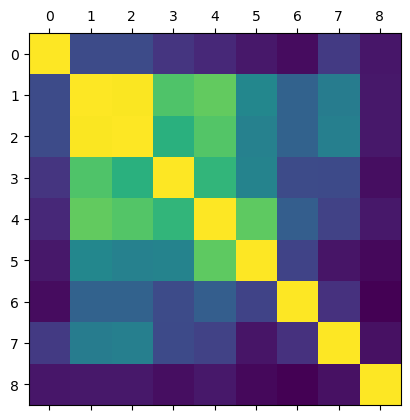

In [17]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_sub.corr())
plt.show()

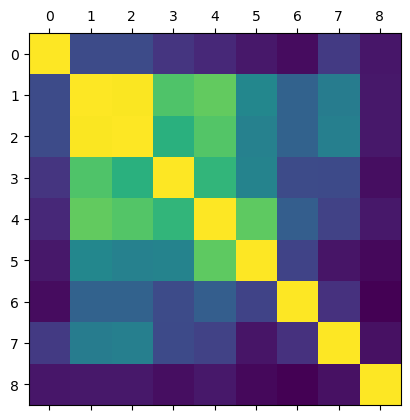

In [18]:
# Save figure
plt.matshow(df_sub.corr())
plt.savefig("out.png") 

In [19]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\ponni\\Achievement 6\\03 Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

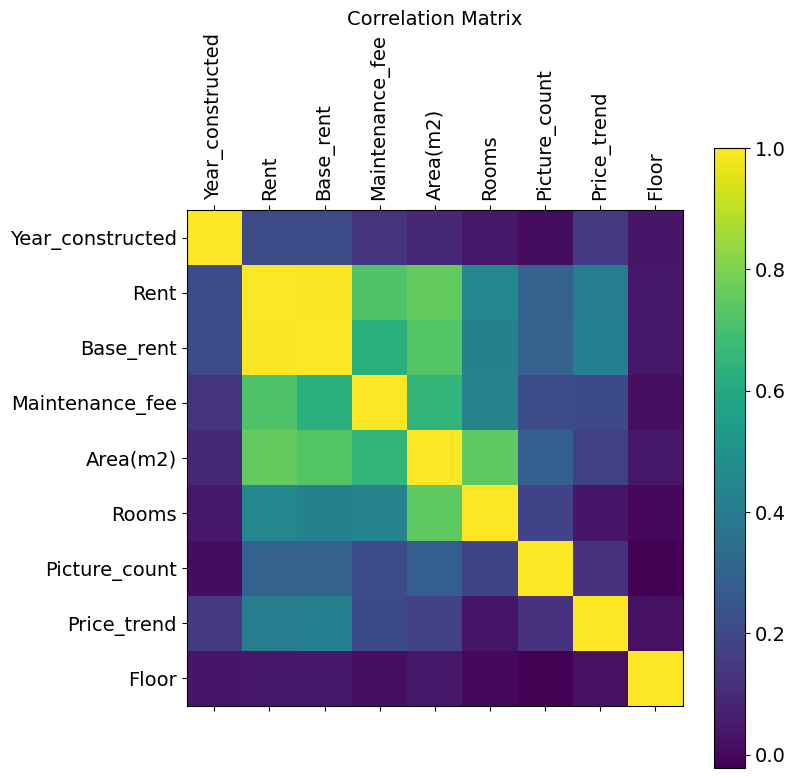

In [20]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14, rotation=90) # x axis labels
plt.yticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

### 3b. Create correlation heatmap using Seaborn:

In [21]:
df_sub

,Year_constructed,Rent,Base_rent,Maintenance_fee,Area(m2),Rooms,Picture_count,Price_trend,Floor
0,1965,840.00,595.0,245.00,86.00,4,6,4.62,1
1,1871,934.00,800.0,134.00,89.00,3,8,3.47,999
2,2019,1220.00,965.0,255.00,83.80,3,8,2.72,3
3,1964,401.15,343.0,58.15,58.15,3,9,1.53,3
4,1950,903.00,765.0,138.00,84.97,3,19,2.46,1
...,...,...,...,...,...,...,...,...,...
209249,2016,910.00,820.0,90.00,90.00,3,0,2.74,999
209250,1983,1150.00,930.0,220.00,115.00,3,12,6.49,1
209251,1965,870.00,650.0,220.00,95.00,4,21,2.90,1
209252,2019,1015.00,840.0,175.00,70.00,2,16,4.39,999


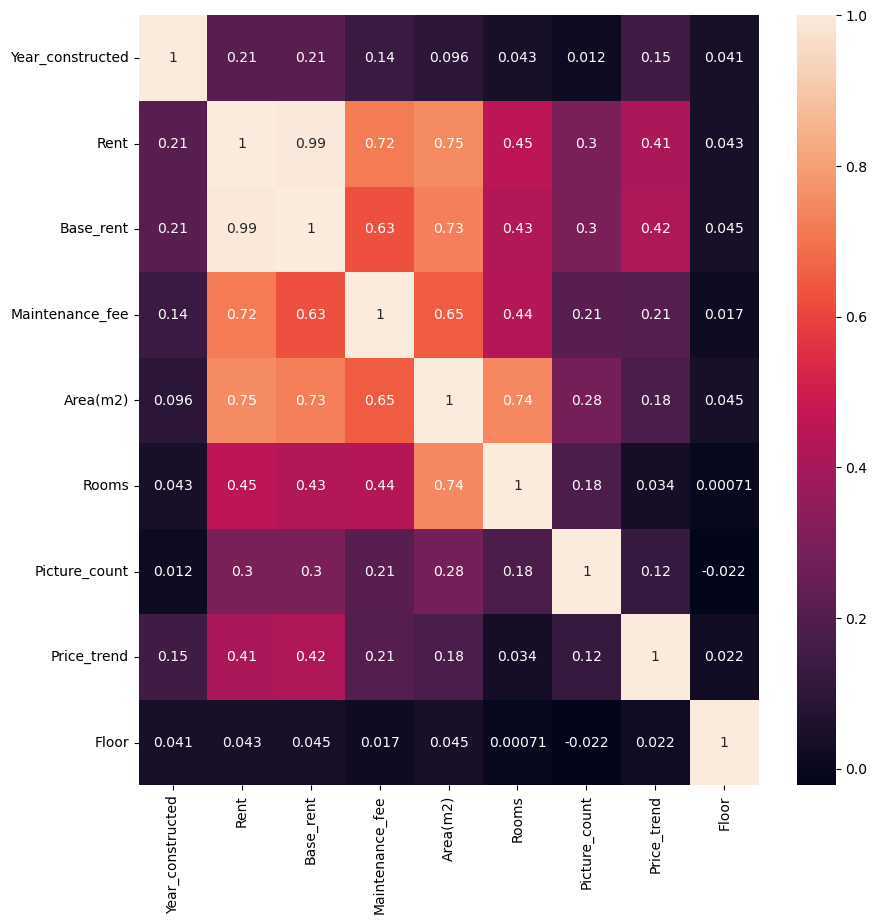

In [22]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax)
# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

#### From the heatmap, we can infer that RENTAL value is positively correlated with Base_rent, Maintenance fee, Area. It means when these factors increases the rental value increases too. The RENTAL value and Year of construction as weak relationship. It means when the get house get old, the rents decreases too.

### 3c. Scatterplots:

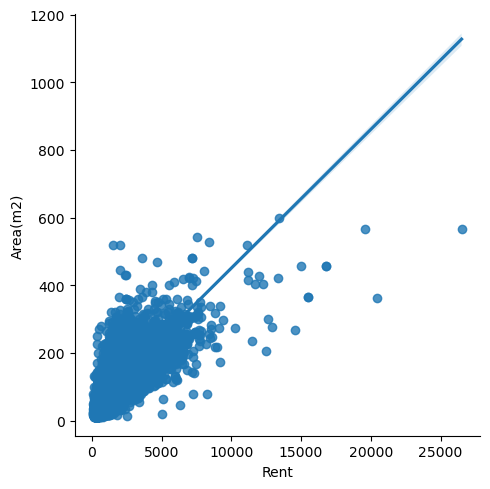

In [24]:
# Create a scatterplot for the "Rent" and "Area(m2)" columns in seaborn

sns.lmplot(x = 'Rent', y = 'Area(m2)', data = df1)

#### The area and rent value are positively correlated. They have a strong relationship with each other.

### 3d. Pair plots: 

In [61]:
# Keep only the variables you want to use in the pair plot

df_sub2 =df_sub[['Rent','Area(m2)','Rooms','Maintenance_fee']]

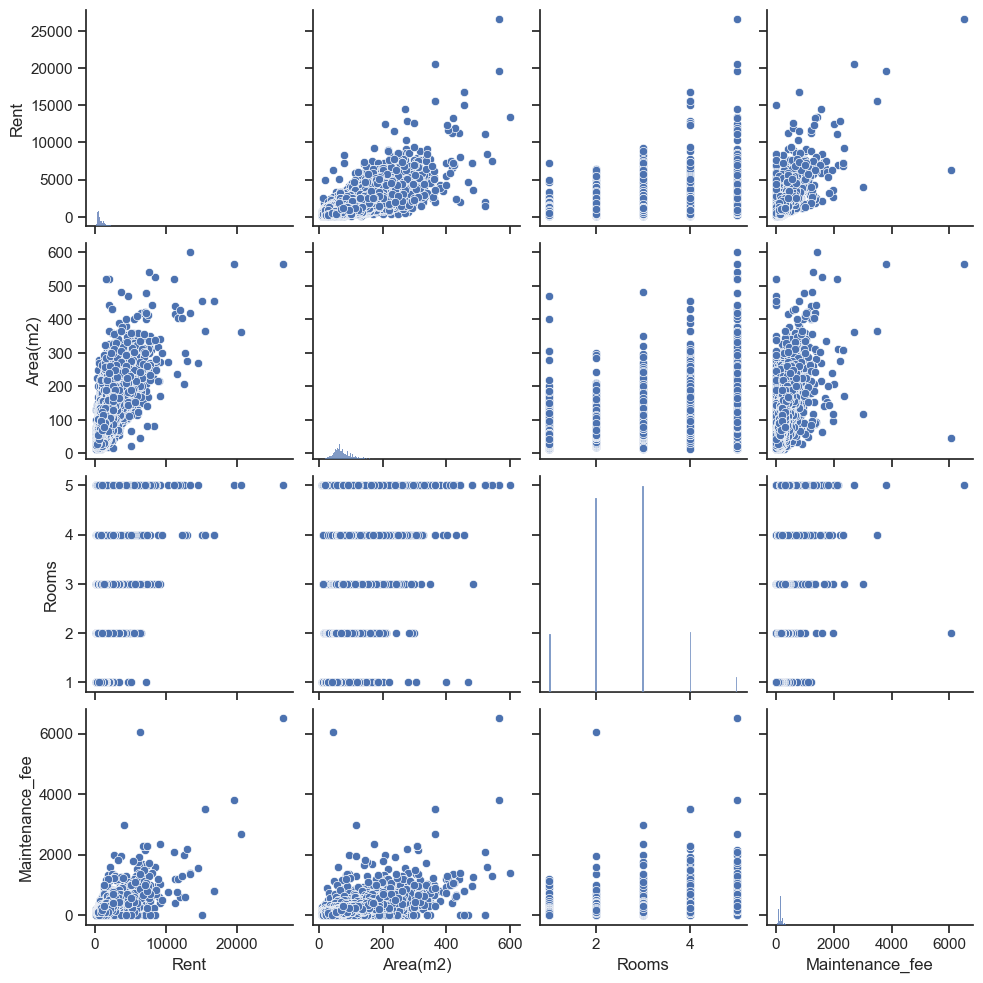

In [62]:
# Create a pair plot 

g = sns.pairplot(df_sub2) 

#### I would like to analyse further about the rooms, area(m2) and rent variable.

### 3e. Categorical Plots:

### Creating a categorical variable 

In [27]:
# creating a column with price per square meter

df_price_per_m2=df1['Base_rent']/df1['Area(m2)']

In [28]:
# adding df_price_per_m2 to the dataset
df1=df1.assign(Price_per_m2=df_price_per_m2)

<AxesSubplot: xlabel='Rent', ylabel='Count'>

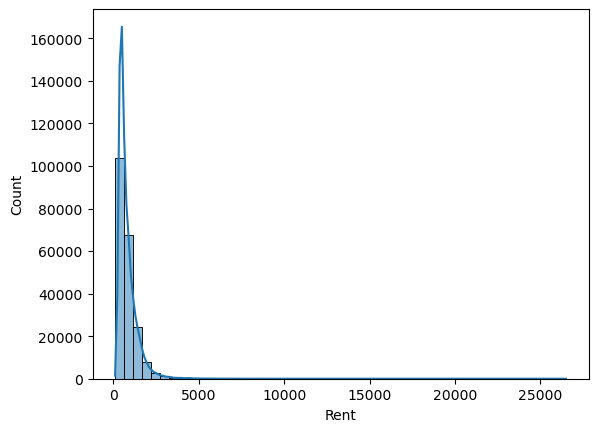

In [29]:
sns.histplot(df1['Rent'], bins = 50, kde = True) #it shows extreme values (i.e)more than 5000euro

In [38]:
df1.shape

(209079, 24)

In [54]:
# creating a subset with only rental value less than 4000 euros
a=df1.loc[df1['Rent'] <4000]

In [ ]:
a.shape

<AxesSubplot: xlabel='Rent', ylabel='Count'>

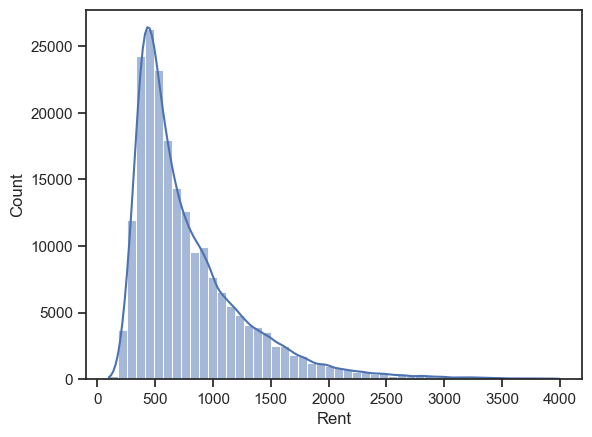

In [55]:
sns.histplot(a['Rent'], bins = 50, kde = True) 

In [56]:
a.describe()

,Pincode,Year_constructed,Rent,Base_rent,Maintenance_fee,Area(m2),Rooms,Picture_count,Price_trend,Floor,Price_per_m2
count,208370.000000,208370.000000,208370.000000,208370.000000,208370.000000,208370.000000,208370.000000,208370.000000,208370.000000,208370.000000,208370.000000
mean,37157.533623,1967.925887,790.066376,642.578121,147.488255,73.261126,2.582272,9.820540,3.376223,171.995719,8.657919
std,27606.855182,38.396432,502.676483,448.768931,83.284060,30.221494,0.919668,6.379339,1.977141,374.816329,4.503302
min,1057.000000,1803.000000,100.000000,1.000000,0.000000,12.000000,1.000000,0.000000,-12.330000,-1.000000,0.029412
25%,9130.000000,1950.000000,446.000000,336.000000,92.000000,54.800000,2.000000,6.000000,1.980000,1.000000,5.619194
50%,38644.000000,1973.000000,630.000000,490.000000,135.000000,67.370000,3.000000,9.000000,3.360000,2.000000,7.386364
75%,56075.000000,1996.000000,980.000000,800.000000,190.000000,86.320000,3.000000,13.000000,4.550000,4.000000,10.199355
max,99994.000000,2022.000000,3997.580000,3980.000000,1976.950000,520.000000,5.000000,121.000000,14.920000,999.000000,178.571429


In [57]:
# Creating a new column Rent_range
a.loc[a['Year_constructed'] <= 1900, 'Rent_range'] = 'low rent'
a.loc[(a['Year_constructed'] >= 1901) & (a['Year_constructed'] <= 2000), 'Rent_range'] = 'Average rent'
a.loc[a['Year_constructed'] >= 2001, 'Rent_range'] = 'High rent '

In [58]:
# Frequency
a['Rent_range'].value_counts(dropna = False)

Average rent    148845
High rent        42429
low rent         17096
Name: Rent_range, dtype: int64

In [ ]:
# Create a categorical plot in seaborn using the Rent_range created above

sns.set(style="ticks")
g = sns.catplot(x="Rent", y="Year_constructed", hue="Rent_range", data=a) 

In [ ]:
#Export the new data
a.to_csv(os.path.join(path,'02 Data','Prepared Data','immodata_new7.csv'))

# Hypothesis:

#### 1. Higher the area of the rental property is, Higher the rental price.

#### 2.Newer the rental property is, higher the rental price.

# Questions to be explored:

#### 1. City's with highest rental price?
#### 2. What is the reason behind higher price in certain area?is it because the area is densely populated?
#### 3. What factors have the most impact on the rental price?
#### 4. When the rental property has more facilities such as Lift, Floor heating, Cellar, Kitchen does it impact the rental price? 